<a href="https://colab.research.google.com/github/JasminPradhan/ML-project-1/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import pickle
import cv2
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

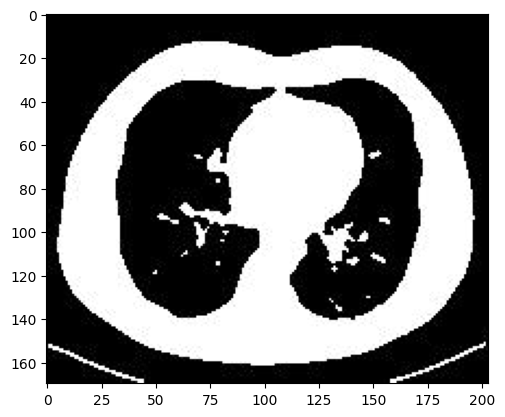

In [117]:
DATADIR="/content/drive/MyDrive/data/tumor_dataset/Train"
CATEGORIES=['BENIGN','MALIGNANT','NORMAL']

for category in CATEGORIES:
  path=os.path.join(DATADIR,category)#path to the respective dir
  for img in os.listdir(path):
    img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_arr,cmap="gray")
    plt.show()
    break
  break

In [118]:
print(img_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


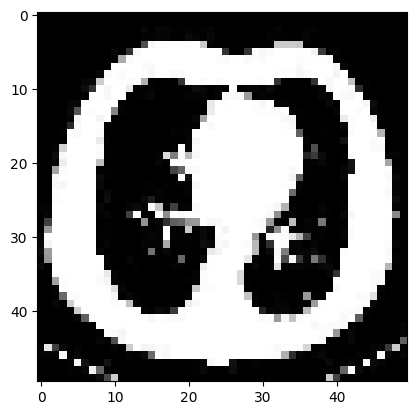

In [119]:
IMG_SIZE=50
new_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_arr,cmap="gray")
plt.show()

In [120]:
training_data=[]

def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)#path to the respective dir
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_arr,class_num])
      except Exception as e:
        pass

create_training_data()

In [121]:
print(len(training_data))

1050


In [122]:
import random
random.shuffle(training_data)

In [123]:
# for sample in training_data:
#   print(sample[1])

In [124]:
import numpy as np

X=[]
y=[]

for features, label in training_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# -1 for indexing and the array size will be of image size and 1 is for grayscale

In [125]:
# pickle_out=open("X.pickle","wb")
# pickle.dump(X,pickle_out)
# pickle_out.close()

# pickle_out=open("y.pickle","wb")
# pickle.dump(y,pickle_out)
# pickle_out.close()


In [126]:
# pickle_in=open("X.pickle","rb")
# X=pickle.load(pickle_in)

In [127]:
# X
print(X.shape)
print(X.shape[1:])

(1050, 50, 50, 1)
(50, 50, 1)


In [128]:
# y
y=np.array(y)
print(y.shape)

(1050,)


In [129]:
from keras.api._v2.keras import activations
X=X/255.0

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))

model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,y,batch_size=64,epochs=50,validation_split=0.45)

Epoch 1/50
10/10 [==============================] - 2s 37ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 4/50
10/10 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 6/50
10/10 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 7/50
10/10 [==============================] - 0s 17ms/step - loss: nan - accuracy: 0.3258 - val_loss: nan - val_accuracy: 0.3425
Epoch 8/50
10/10 [==============================] - 0s 